In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as mp
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Clean combined movies dataset
movies_path ='updated_clean_combined_movies.csv'
movies_df = pd.read_csv(movies_path)

# Display Clean Movies dataset column names
print("\nClean Combined Movies dataset column names:")
print(movies_df.columns.tolist())


Clean Combined Movies dataset column names:
['title', 'age_rating', 'duration_min', 'genre', 'budget', 'revenue', 'platform']


# **Visualization of Numbers of Movies in each Genre plus Top 5**

---



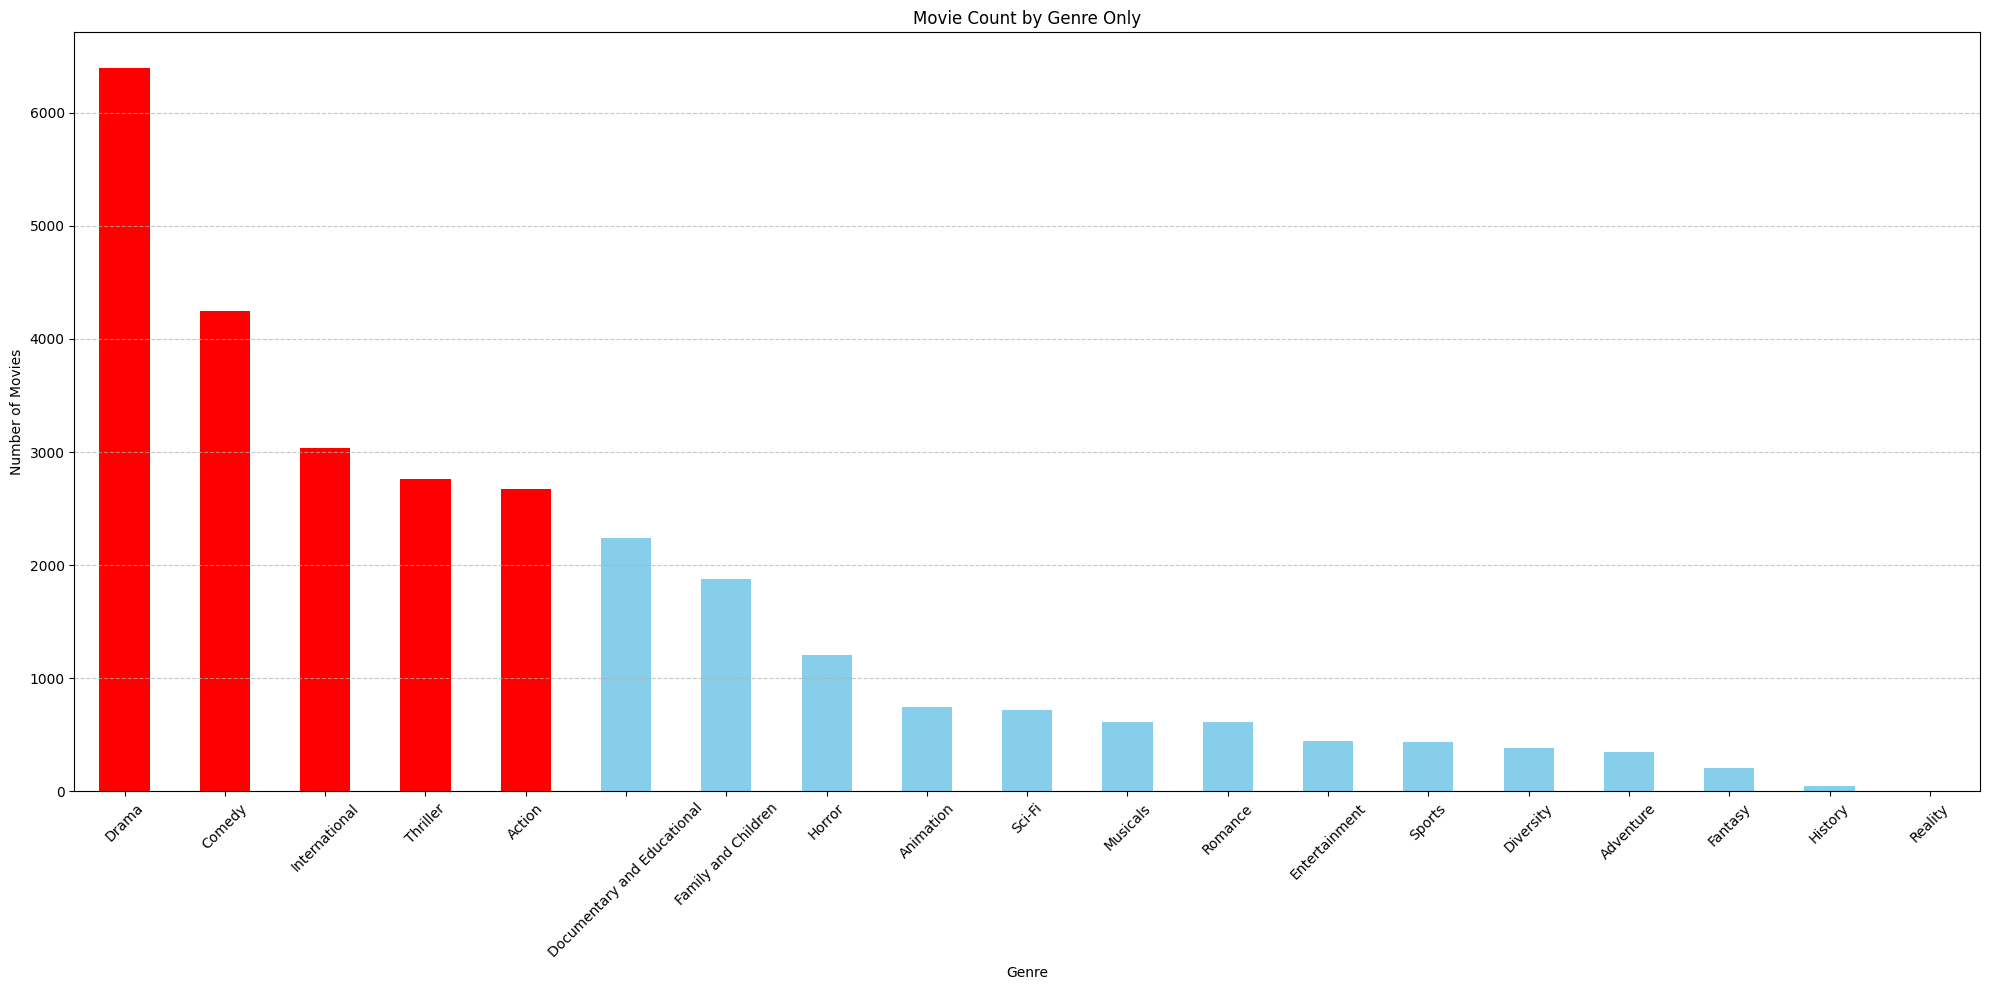

In [108]:
movies_df = movies_df.assign(genre=movies_df['genre'].str.split(', ')).explode('genre')
movies_genre_counts = movies_df['genre'].value_counts()

# Define colors for top 5 genres and other genres
top_5_colors = ['red' if genre in movies_genre_counts.head(5).index else 'skyblue' for genre in movies_genre_counts.index]

# Plotting all genres
plt.figure(figsize=(20, 10))
movies_genre_counts.plot(kind='bar', color=top_5_colors)

# Adding labels and titles
plt.title('Movie Count by Genre Only')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


<Figure size 2000x1000 with 0 Axes>

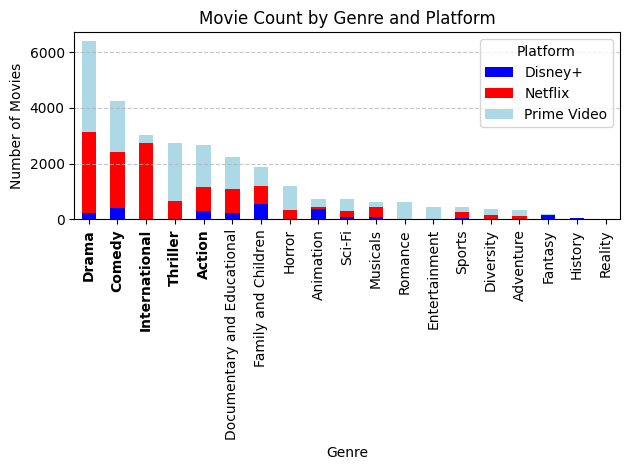

In [106]:
pivot_data = movies_df.pivot_table(index='genre', columns='platform', values='title', aggfunc='count', fill_value=0)

# Calculate total number of movies for each genre
pivot_data['total_movies'] = pivot_data.sum(axis=1)

# Sort genres based on total number of movies
pivot_data_sorted = pivot_data.sort_values(by='total_movies', ascending=False)

# Plotting stacked bar chart
plt.figure(figsize=(20, 10))
ax = pivot_data_sorted.drop(columns='total_movies').plot(kind='bar', stacked=True, color=['blue', 'red', 'lightblue'])

# Adding labels and titles
plt.title('Movie Count by Genre and Platform')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Platform')

# Get top 5 genres
top_5_genres = pivot_data_sorted.index[:5]

# Bold font for top 5 performing genres
for label in ax.get_xticklabels():
    if label.get_text() in top_5_genres:
        label.set_weight('bold')

# Add data labels for top 5 genres
for patch in ax.patches:
    genre = patch.get_label()
    if genre in top_5_genres:
        height = patch.get_height()
        width = patch.get_width()
        x, y = patch.get_xy()
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=8, color='black')
        container.get_label() in top_5_genres
        ax.bar_label(container, label_type='edge')

plt.show()

<Figure size 2000x1000 with 0 Axes>

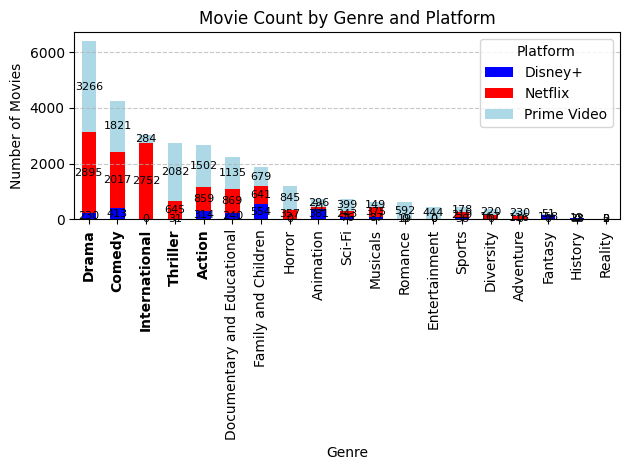

In [107]:
# Plotting stacked bar chart with larger size
plt.figure(figsize=(20, 10))
ax = pivot_data_sorted.drop(columns='total_movies').plot(kind='bar', stacked=True, color=['blue', 'red', 'lightblue'])

# Adding labels and titles
plt.title('Movie Count by Genre and Platform')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Platform')

# Get top 5 genres
top_5_genres = pivot_data_sorted.index[:5]

# Bold font for top 5 performing genres
for label in ax.get_xticklabels():
    if label.get_text() in top_5_genres:
        label.set_weight('bold')

# Annotate bars with values
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x, y = patch.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=8, color='black')

plt.show()

# **Visualization of Revenue by Age Rating**

---



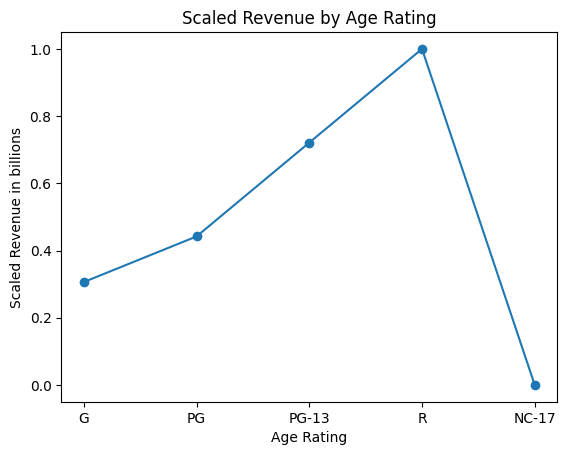

In [116]:
# Assuming 'rating' is the column with the age ratings and 'revenue' is the column with revenue
filtered_df = movies_df[(movies_df['age_rating'] != 'Miscellaneous') & (movies_df['age_rating'] != 'NR')]

# Define the order of ratings
rating_order = ['G', 'PG', 'PG-13', 'R', 'NC-17']

# Create a new DataFrame to store aggregated revenue for each rating
revenue_by_rating = filtered_df.groupby('age_rating')['revenue'].sum().reindex(rating_order)

# Scale down the revenue data
scaler = MinMaxScaler()
revenue_scaled = scaler.fit_transform(revenue_by_rating.values.reshape(-1, 1)).flatten()

# Plotting
plt.plot(revenue_by_rating.index, revenue_scaled, marker='o', linestyle='-')
plt.title('Scaled Revenue by Age Rating')
plt.xlabel('Age Rating')
plt.ylabel('Scaled Revenue in billions')
plt.show()

# **Visualization of Number of Movies by Age Rating**

---



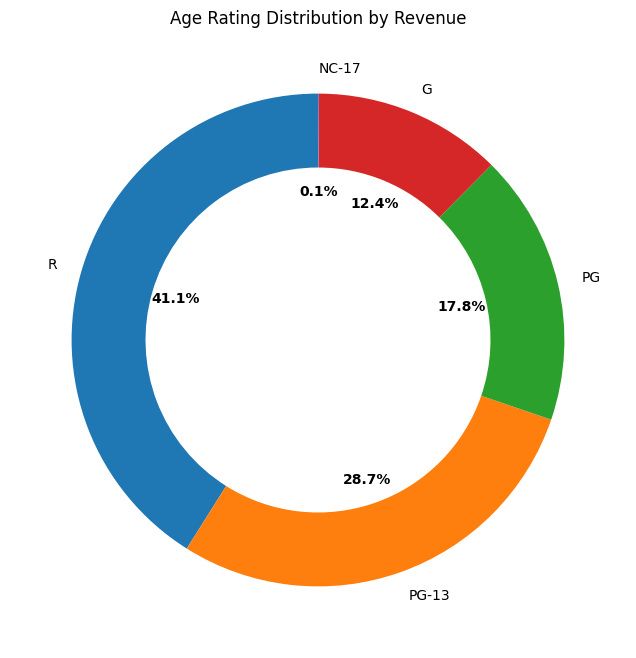

In [145]:
# Filter out 'NR' and 'Miscellaneous'
filtered_df = movies_df[~movies_df['age_rating'].isin(['NR', 'Miscellaneous'])]

# Calculate the number of movies for each Age Rating
age_rating_counts = filtered_df['age_rating'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Outer Ring: Age Rating
wedges, texts, autotexts = ax.pie(age_rating_counts, labels=age_rating_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

plt.setp(autotexts, size=10, weight="bold")

# Plot Title
ax.set_title("Age Rating Distribution by Revenue")

plt.show()

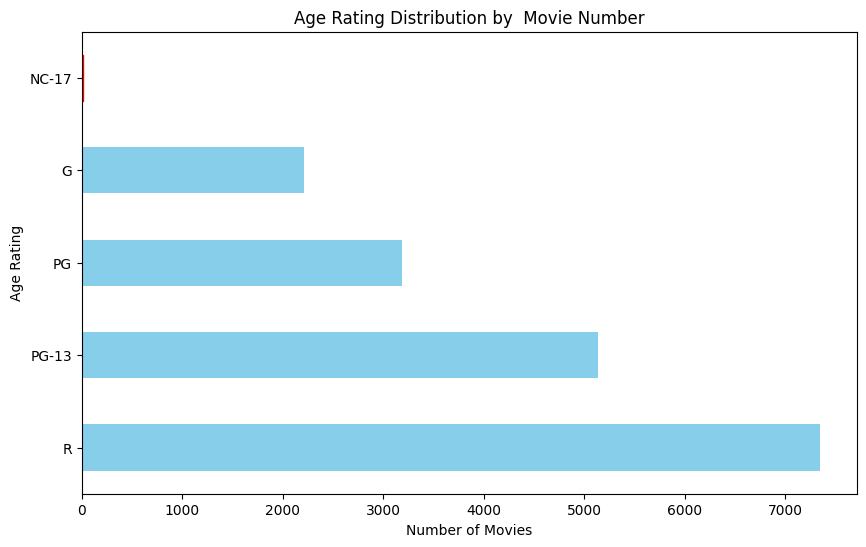

In [144]:
# Filter out 'NR' and 'Miscellaneous'
filtered_df = movies_df[~movies_df['age_rating'].isin(['NR', 'Miscellaneous'])]

# Calculate the number of movies for each Age Rating
age_rating_counts = filtered_df['age_rating'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Horizontal Bar Plot
age_rating_counts.plot(kind='barh', color='skyblue')

# Highlight 'NC-17' segment
if 'NC-17' in age_rating_counts.index:
    nc17_index = age_rating_counts.index.get_loc('NC-17')
    ax.get_children()[nc17_index].set_color('red')

# Plot Title and Labels
ax.set_title("Age Rating Distribution by  Movie Number")
ax.set_xlabel("Number of Movies")
ax.set_ylabel("Age Rating")

plt.show()